In [1]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(100_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt
import importlib

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [3]:
sac_rt_itp_id = 273

In [4]:
analysis_date = dt.date(2022, 2, 8)

In [5]:
pbar = tqdm()

0it [00:00, ?it/s]

In [6]:
sac_rt = rt.OperatorDayAnalysis(sac_rt_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
could not generate delays for trip 991293
Columns must be same length as key
could not generate delays for trip 993942
Columns must be same length as key


/opt/conda/lib/python3.9/site-packages/siuba/sql/utils.py:52: SAWarning: Dialect bigquery:bigquery will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)


In [7]:
sac_rt.set_filter(start_time='15:00', end_time='19:00')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': None, 'direction_id': None, 'direction': None}


In [8]:
m = rt.OperatorDayAnalysis.segment_speed_map(sac_rt)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': None, 'direction_id': None, 'direction': None}
speed above 80 for shape 41007, dropping
negative speed for shape 40808, dropping
speed above 80 for shape 40844, dropping
negative speed for shape 40844, dropping
speed above 80 for shape 40853, dropping


TopologyException: assigned depths do not match at -121992.84082232323 62752.425028798818
/opt/conda/lib/python3.9/site-packages/shapely/ops.py:634: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:572: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [20]:
sac_rt.scheduled_trip_rt_coverage

0.76796875

In [22]:
# m

In [10]:
sac_rt.stop_segment_speed_view = sac_rt.stop_segment_speed_view >> arrange(_.trips_per_hour)

In [11]:
# rt.OperatorDayAnalysis._show_speed_map(sac_rt, how='low_speeds', colorscale = utils.ZERO_THIRTY_COLORSCALE, size = [900, 550])

In [12]:
florin1 = sac_rt.position_interpolators['992810']['rt']
# florin1.detailed_speed_map()

In [38]:
florin2 = sac_rt.position_interpolators['992849']['rt']
m = florin2.detailed_speed_map()

/opt/conda/lib/python3.9/site-packages/shapely/ops.py:634: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:109: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [39]:
m.save('./tripmaps/273_rt_081_tr_992849.html')

In [14]:
sac_rt.rt_trips = sac_rt.rt_trips >> inner_join(_, sac_rt.endpoint_delay_view >> select(_.trip_id, _.endpoint_delay == _.delay,
                                                                      _.arrival_hour)
                              , on = 'trip_id')

In [15]:
sac_rt.rt_trips >> arrange(-_.endpoint_delay)

,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,median_time,direction,mean_speed_mph,endpoint_delay,arrival_hour
1217,273,0,2022-02-08,7604500401212340186,991485,051,0,40770,2021-12-17,2099-01-01,06:33:00,Northbound,11.435978,0 days 00:52:07.711814,6
1543,273,0,2022-02-08,-6338363960220385199,993897,138,0,40847,2021-12-17,2099-01-01,07:04:30,Westbound,24.915089,0 days 00:40:00.024699,6
553,273,0,2022-02-08,-2947005468291523101,990964,026,0,40760,2021-12-17,2099-01-01,17:08:00,Southbound,9.578548,0 days 00:23:58.102561,17
590,273,0,2022-02-08,2613461417951518281,993889,138,0,40847,2021-12-17,2099-01-01,09:56:30,Westbound,58.745901,0 days 00:23:16.722503,9
823,273,0,2022-02-08,-8356190538517605376,993905,138,1,40853,2021-12-17,2099-01-01,07:47:30,Eastbound,44.161993,0 days 00:22:26.521702,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,273,0,2022-02-08,4434607073140252276,992219,067,1,40786,2021-12-17,2099-01-01,11:19:00,Southbound,15.688883,0 days 00:00:00,11
1927,273,0,2022-02-08,2395426288088610260,989934,011,1,40739,2021-12-17,2099-01-01,15:47:00,Northbound,13.537608,0 days 00:00:00,16
1928,273,0,2022-02-08,3206225287228501872,989935,011,1,40739,2021-12-17,2099-01-01,15:23:00,Northbound,13.754458,0 days 00:00:00,15
1929,273,0,2022-02-08,2754952228455939726,990597,021,1,40752,2021-12-17,2099-01-01,20:57:30,Northbound,19.954131,0 days 00:00:00,21


In [16]:
## awesome example here
fwy_slow = sac_rt.position_interpolators['990964']['rt']

In [36]:
# fwy_slow.detailed_speed_map()

{'start_time': datetime.time(6, 0), 'end_time': datetime.time(22, 0), 'route_ids': ['081'], 'direction_id': '1', 'direction': None}
view filter: {'start_time': datetime.time(6, 0), 'end_time': datetime.time(22, 0), 'route_ids': ['081'], 'direction_id': '1', 'direction': None}


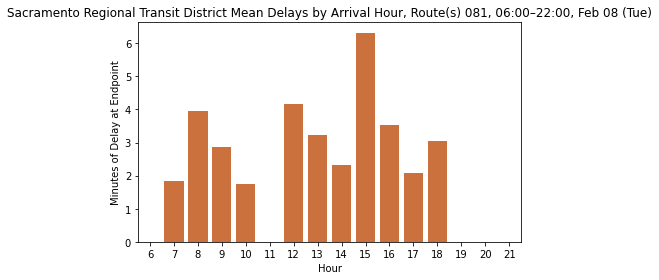

In [50]:
sac_rt.reset_filter()
sac_rt.set_filter(start_time='06:00', end_time='22:00', route_ids=['081'], direction_id='1')
chart = sac_rt.chart_delays()

In [51]:
chart.savefig('./rt.png', bbox_inches='tight')

In [26]:
m = sac_rt.segment_speed_map()

negative speed for shape 40808, dropping
negative speed for shape 40896, dropping
negative speed for shape 40895, dropping
speed above 80 for shape 40844, dropping
negative speed for shape 40844, dropping
negative speed for shape 40843, dropping
speed above 80 for shape 40853, dropping


TopologyException: assigned depths do not match at -129275.25014734207 59157.859164427187
TopologyException: assigned depths do not match at -129275.25014734207 59157.859164427187
TopologyException: assigned depths do not match at -121992.84082232323 62752.425028798818
/opt/conda/lib/python3.9/site-packages/shapely/ops.py:634: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
/home/jovyan/data-analyses/rt_delay/rt_analysis.py:572: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [42]:
sac_rt.rt_trips.mean_speed_mph.median()

15.163494924867663